In [188]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the dataset

In [189]:
df = pd.read_csv('diabetes_exam.csv')
df.head(5)

,PatientID,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,1,52,Male,30.239636,149,113,115,0.312886,1
1,2,53,Female,30.932781,71,39,104,0.389526,0
2,3,21,Male,45.092714,161,67,151,1.205869,0
3,4,39,Male,47.795530,101,165,184,0.595201,1
4,5,22,Female,20.718108,160,158,116,0.974248,1


# 2.Data Understanding

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 200 non-null    int64  
 1   Age                       200 non-null    int64  
 2   Gender                    200 non-null    object 
 3   BMI                       200 non-null    float64
 4   BloodPressure             200 non-null    int64  
 5   Insulin                   200 non-null    int64  
 6   Glucose                   200 non-null    int64  
 7   DiabetesPedigreeFunction  200 non-null    float64
 8   Outcome                   200 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 14.2+ KB


In [191]:
df.shape

(200, 9)

In [192]:
df.describe()

,PatientID,Age,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,48.630000,31.683698,127.560000,130.025000,137.760000,1.055012,0.475000
std,57.879185,14.129093,7.080794,24.046362,57.056125,27.499336,0.502943,0.500628
min,1.000000,21.000000,18.663323,71.000000,15.000000,70.000000,0.148171,0.000000
25%,50.750000,39.000000,26.779537,115.000000,95.000000,123.000000,0.681338,0.000000
50%,100.500000,48.500000,30.916391,130.000000,116.500000,140.000000,0.972823,0.000000
75%,150.250000,58.000000,35.725000,143.250000,159.250000,154.250000,1.377358,1.000000
max,200.000000,79.000000,49.427988,178.000000,273.000000,198.000000,2.467637,1.000000


In [193]:
df.isna().sum()

,0
PatientID,0
Age,0
Gender,0
BMI,0
BloodPressure,0
Insulin,0
Glucose,0
DiabetesPedigreeFunction,0
Outcome,0


# 3.EDA

In [194]:
df = df.drop('PatientID',axis = 1)
df

,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction,Outcome
0,52,Male,30.239636,149,113,115,0.312886,1
1,53,Female,30.932781,71,39,104,0.389526,0
2,21,Male,45.092714,161,67,151,1.205869,0
3,39,Male,47.795530,101,165,184,0.595201,1
4,22,Female,20.718108,160,158,116,0.974248,1
...,...,...,...,...,...,...,...,...
195,40,Male,28.300000,123,100,137,0.770000,0
196,54,Female,33.600000,140,118,149,1.160000,1
197,58,Male,29.900000,128,111,139,0.860000,0
198,35,Female,26.000000,117,94,125,0.620000,0


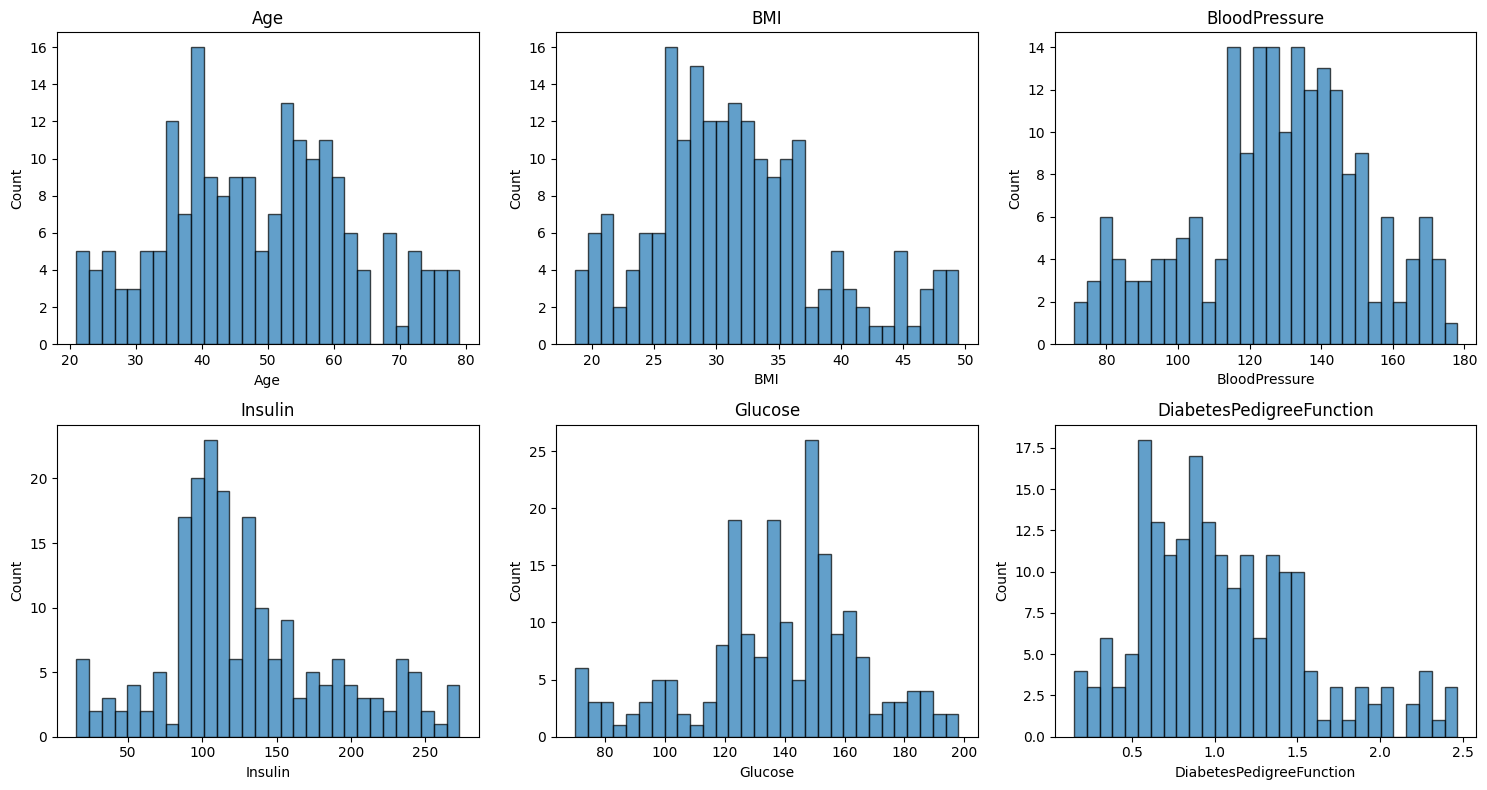

In [195]:
import matplotlib.pyplot as plt

# Select numeric features (exclude ID/target if needed)
num_cols = ["Age", "BMI", "BloodPressure", "Insulin", "Glucose", "DiabetesPedigreeFunction"]

# Layout for subplots
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


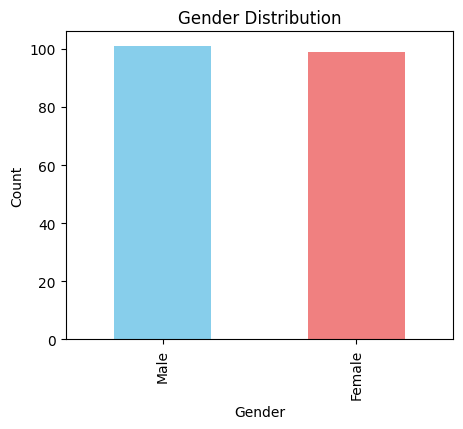

In [196]:
plt.figure(figsize=(5,4))
df["Gender"].value_counts().plot(kind="bar", color=["skyblue","lightcoral"])
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xlabel("Gender")
plt.show()


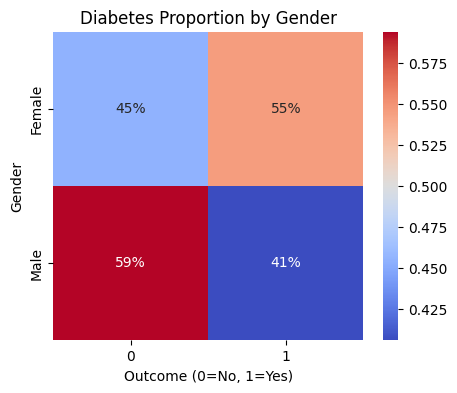

In [197]:
cross_tab = pd.crosstab(df["Gender"], df["Outcome"], normalize="index")

plt.figure(figsize=(5,4))
sns.heatmap(cross_tab, annot=True, fmt=".0%", cmap="coolwarm")
plt.title("Diabetes Proportion by Gender")
plt.xlabel("Outcome (0=No, 1=Yes)")
plt.ylabel("Gender")
plt.show()


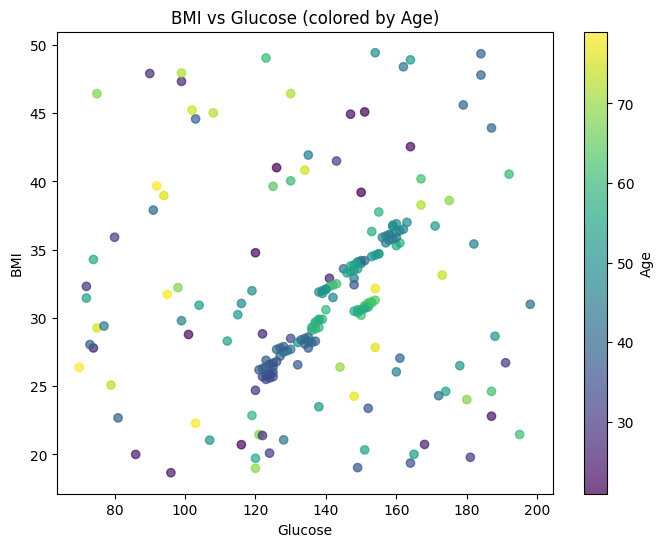

In [198]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(df["Glucose"], df["BMI"],
                      c=df["Age"], cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Age")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("BMI vs Glucose (colored by Age)")
plt.show()


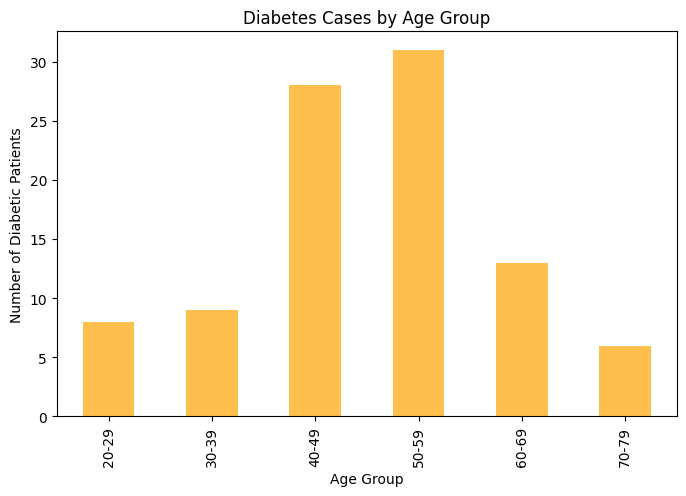

In [199]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,70,80],
                        labels=["20-29","30-39","40-49","50-59","60-69","70-79"])

agegroup_counts = df[df["Outcome"] == 1]["AgeGroup"].value_counts().sort_index()

plt.figure(figsize=(8,5))
agegroup_counts.plot(kind="bar", color="orange", alpha=0.7)
plt.xlabel("Age Group")
plt.ylabel("Number of Diabetic Patients")
plt.title("Diabetes Cases by Age Group")
plt.show()

/tmp/ipython-input-2136555515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="AgeGroup", y=feature, ax=axes[i], errorbar=None, palette="viridis")
/tmp/ipython-input-2136555515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="AgeGroup", y=feature, ax=axes[i], errorbar=None, palette="viridis")
/tmp/ipython-input-2136555515.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="AgeGroup", y=feature, ax=axes[i], errorbar=None, palette="viridis")
/tmp/ipython-input-2136555515.py:17: FutureWarning: 

Pass

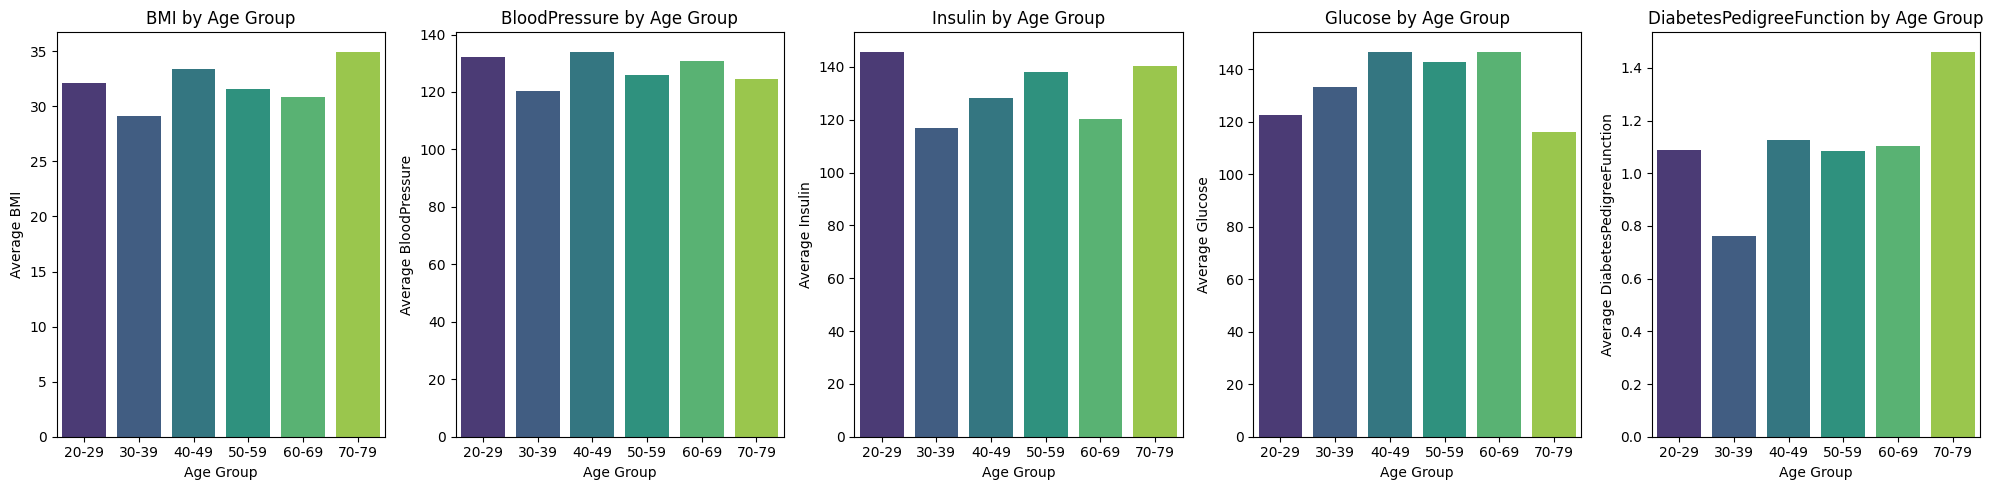

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create Age Groups
df["AgeGroup"] = pd.cut(df["Age"],
                        bins=[20,30,40,50,60,70,80],
                        labels=["20-29","30-39","40-49","50-59","60-69","70-79"])

# 2. Define features to plot
features = ["BMI", "BloodPressure", "Insulin", "Glucose", "DiabetesPedigreeFunction"]

# 3. Setup subplots
fig, axes = plt.subplots(1, len(features), figsize=(20,5), sharey=False)

# 4. Plot each feature against AgeGroup
for i, feature in enumerate(features):
    sns.barplot(data=df, x="AgeGroup", y=feature, ax=axes[i], errorbar=None, palette="viridis")
    axes[i].set_title(f"{feature} by Age Group")
    axes[i].set_xlabel("Age Group")
    axes[i].set_ylabel("Average " + feature)

plt.tight_layout()
plt.show()


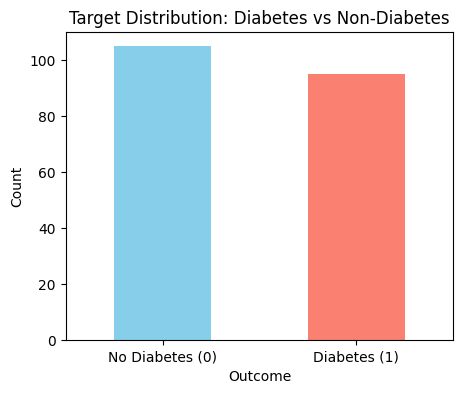

In [201]:
plt.figure(figsize=(5,4))
df["Outcome"].value_counts().plot(kind="bar", color=["skyblue","salmon"])
plt.xticks([0,1], ["No Diabetes (0)", "Diabetes (1)"], rotation=0)
plt.ylabel("Count")
plt.title("Target Distribution: Diabetes vs Non-Diabetes")
plt.show()


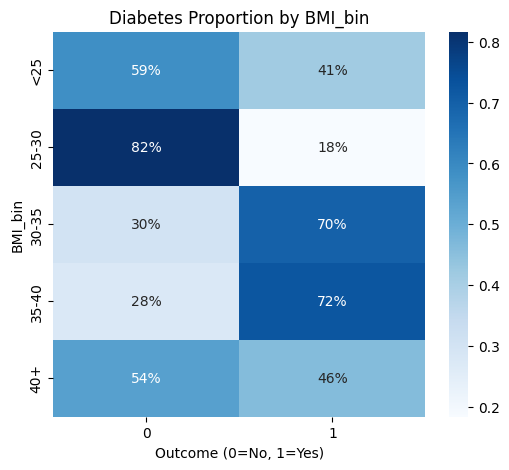

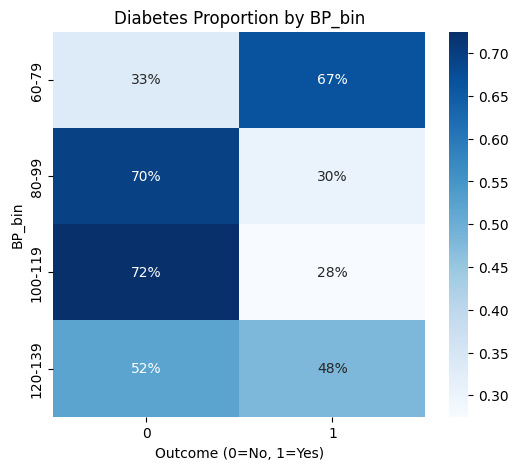

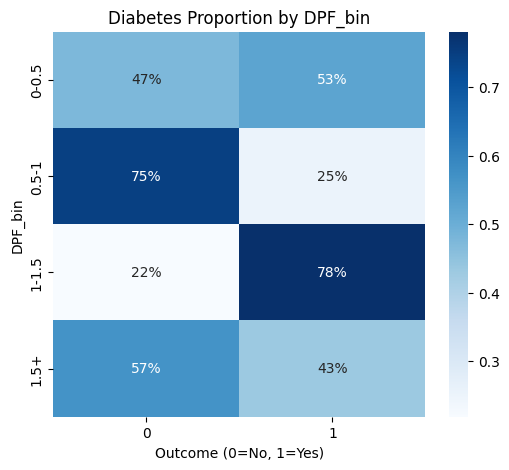

In [202]:
# Create bins for BMI, BP, and DPF
df["BMI_bin"] = pd.cut(df["BMI"], bins=[0,25,30,35,40,100],
                       labels=["<25","25-30","30-35","35-40","40+"])
df["BP_bin"] = pd.cut(df["BloodPressure"], bins=[40,60,80,100,120,140],
                      labels=["40-59","60-79","80-99","100-119","120-139"])
df["DPF_bin"] = pd.cut(df["DiabetesPedigreeFunction"], bins=[0,0.5,1,1.5,2.5],
                       labels=["0-0.5","0.5-1","1-1.5","1.5+"])

# Loop through features
for feature in ["BMI_bin","BP_bin","DPF_bin"]:
    cross_tab = pd.crosstab(df[feature], df["Outcome"], normalize="index")
    plt.figure(figsize=(6,5))
    sns.heatmap(cross_tab, annot=True, fmt=".0%", cmap="Blues")
    plt.title(f"Diabetes Proportion by {feature}")
    plt.xlabel("Outcome (0=No, 1=Yes)")
    plt.ylabel(feature)
    plt.show()


# EDA Summary


Target Balance
**bold text**
Outcome is fairly balanced: ~52% non-diabetic, ~48% diabetic.

No severe imbalance → standard modeling is fine (no resampling required).

**Gender**

females show a higher diabetes prevalence (55%) compared to males (41%), while males have a higher proportion of non-diabetes cases (59%).

**Age**

Most patients are between 40–60 years.

Diabetes cases peak in the 40–59 age groups.



***BMI***

Higher BMI is associated with diabetes.

Heatmap shows patients in 30–40 BMI range have the highest diabetes proportion (~70%).



Blood Pressure
**bold text**
Most values fall between 100–140 mmHg.

Moderate BP (100–119) is linked with higher diabetes cases (~70%).

Very high or very low BP groups show mixed results.



**Glucose**

Strong visual separation between diabetic vs non-diabetic patients.

Higher glucose strongly correlates with diabetes presence.



**Insulin**

Distribution is skewed; many patients have low or missing values.

Needs imputation/normalization before modeling.

Diabetes Pedigree Function (DPF)

Higher DPF values (≥1.0) are strongly associated with diabetes (≈78%).

Indicates family history has predictive value.



**Correlations**

Features most correlated with Outcome: BMI, BloodPressure, Insulin, DPF, Glucose (all ~0.12–0.21).

No single feature dominates; prediction will rely on combining multiple factors.

# 4.Feature Engineering

In [203]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
print(df["Gender"].value_counts())


Gender
1    101
0     99
Name: count, dtype: int64


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       200 non-null    int64   
 1   Gender                    200 non-null    int64   
 2   BMI                       200 non-null    float64 
 3   BloodPressure             200 non-null    int64   
 4   Insulin                   200 non-null    int64   
 5   Glucose                   200 non-null    int64   
 6   DiabetesPedigreeFunction  200 non-null    float64 
 7   Outcome                   200 non-null    int64   
 8   AgeGroup                  200 non-null    category
 9   BMI_bin                   200 non-null    category
 10  BP_bin                    142 non-null    category
 11  DPF_bin                   200 non-null    category
dtypes: category(4), float64(2), int64(6)
memory usage: 14.2 KB


## 4.1 Feature Selection

In [205]:
X = df.iloc[:,:-5]
y= df.iloc[:,-5]

In [206]:
X

,Age,Gender,BMI,BloodPressure,Insulin,Glucose,DiabetesPedigreeFunction
0,52,1,30.239636,149,113,115,0.312886
1,53,0,30.932781,71,39,104,0.389526
2,21,1,45.092714,161,67,151,1.205869
3,39,1,47.795530,101,165,184,0.595201
4,22,0,20.718108,160,158,116,0.974248
...,...,...,...,...,...,...,...
195,40,1,28.300000,123,100,137,0.770000
196,54,0,33.600000,140,118,149,1.160000
197,58,1,29.900000,128,111,139,0.860000
198,35,0,26.000000,117,94,125,0.620000


In [207]:
y

,Outcome
0,1
1,0
2,0
3,1
4,1
...,...
195,0
196,1
197,0
198,0


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (160, 7)
X_test Shape:  (40, 7)
y_train Shape:  (160,)
y_test Shape:  (40,)


In [209]:
y_test.value_counts()

,count
Outcome,
1,20
0,20


In [210]:
y_train.value_counts()

,count
Outcome,
0,85
1,75


In [211]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
# --- Models and parameters ---
models = {
    "LogisticRegression": (LogisticRegression(max_iter=500), {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear", "lbfgs"]
    }),
    "DecisionTree": (DecisionTreeClassifier(), {
        "max_depth": [3, 5, 10, None],
        "criterion": ["gini", "entropy"]
    }),
    "RandomForest": (RandomForestClassifier(), {
        "n_estimators": [100, 200, 300],
        "max_depth": [5, 10, 15, 20]
    }),
    "NaiveBayes": (GaussianNB(), {})
}

best_models = {}

# --- GridSearch for each model ---
for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring="f1", n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    print(f"\n{name} Best Params: {grid.best_params_}")
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"{name} F1-score: {f1_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))

    best_models[name] = grid.best_estimator_



LogisticRegression Best Params: {'C': 10, 'solver': 'lbfgs'}
LogisticRegression Accuracy: 0.775
LogisticRegression F1-score: 0.791
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        20
           1       0.74      0.85      0.79        20

    accuracy                           0.78        40
   macro avg       0.78      0.77      0.77        40
weighted avg       0.78      0.78      0.77        40


DecisionTree Best Params: {'criterion': 'gini', 'max_depth': None}
DecisionTree Accuracy: 0.800
DecisionTree F1-score: 0.789
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.83      0.75      0.79        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40


RandomForest Best Params: {'max_depth': 15, 'n_estimators': 300}
RandomForest Accuracy:

Best Model: Logistic Regression (C=10, solver=lbfgs)



*   Accuracy: ~77.5%
*   F1-score: ~0.79

Logistic Regression provided the most balanced performance across precision and recall compared to other models.

# 5.Evaluation

In [212]:
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report, roc_curve, auc, precision_recall_curve
)

In [213]:
best_lr = best_models["LogisticRegression"]


y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]


In [214]:
len(X_test)

40

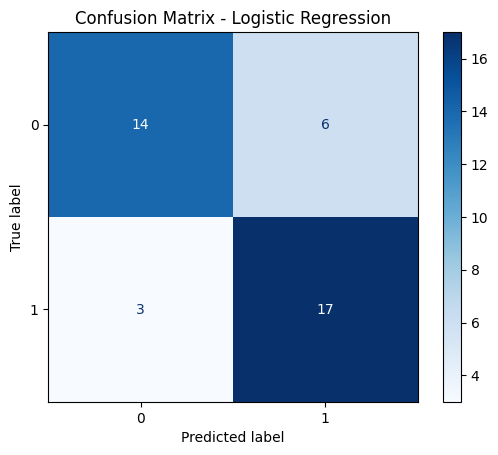

In [215]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_lr.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

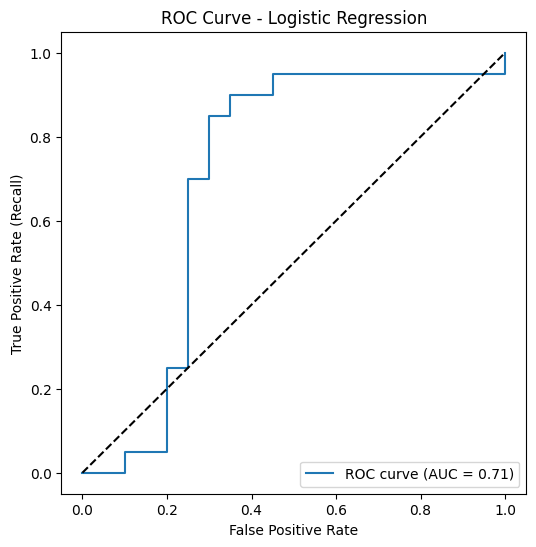

In [216]:
# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

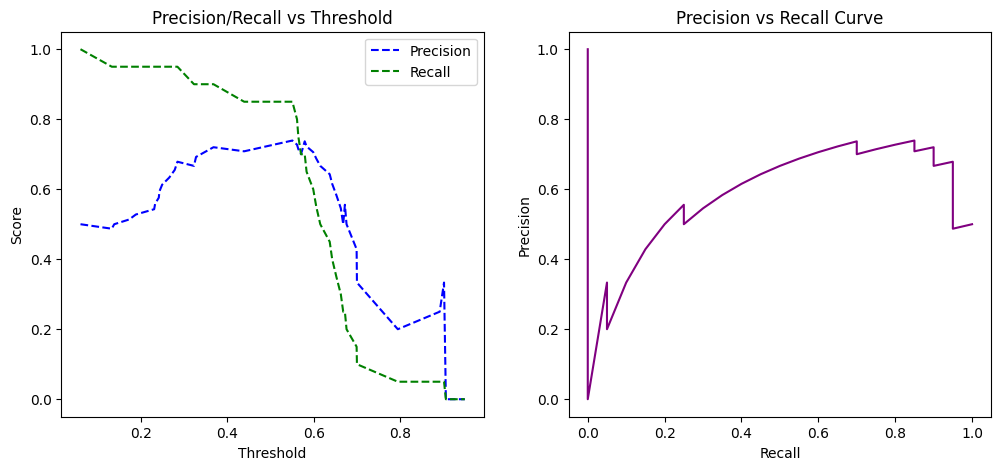

In [217]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Precision/Recall vs Threshold")

plt.subplot(1,2,2)
plt.plot(recalls, precisions, "purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall Curve")

plt.show()

Confusion Matrix (not shown here) indicated the model captured most positive cases while still keeping false positives moderate.

**ROC Curve**

AUC ≈ 0.71 → the model performs better than random guessing.

Curve lies above the diagonal, showing the model’s ability to distinguish between diabetics and non-diabetics.

**Precision–Recall Curves**

As threshold decreases, recall increases but precision drops (expected trade-off).

Clinically, if the priority is early detection of diabetes, a lower threshold (favoring recall) may be more useful, even if precision decreases.

# 6.Feature Importance

Feature Importance (Logistic Regression):
                    Feature  Coefficient  Importance
1                    Gender    -1.075336    1.075336
6  DiabetesPedigreeFunction     0.519640    0.519640
2                       BMI     0.064767    0.064767
3             BloodPressure     0.025612    0.025612
0                       Age     0.013666    0.013666
4                   Insulin     0.009321    0.009321
5                   Glucose     0.008124    0.008124


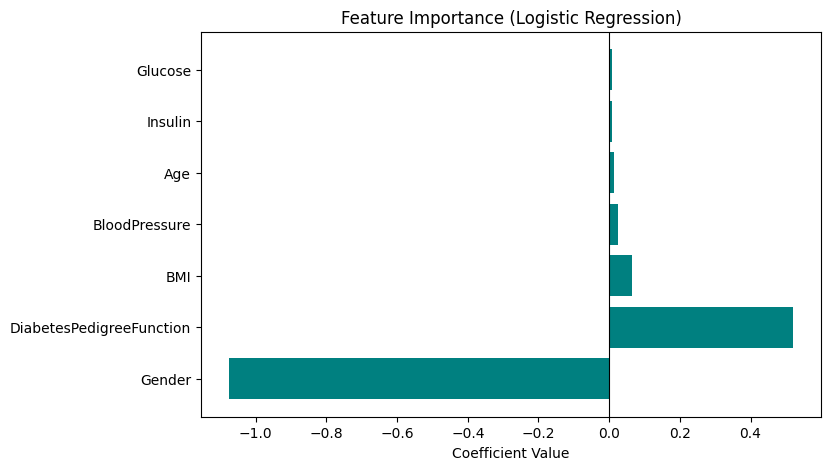

In [218]:
coefficients = best_lr.coef_[0]
feature_names = X_train.columns

# Put into DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Importance": np.abs(coefficients)
}).sort_values(by="Importance", ascending=False)

print("Feature Importance (Logistic Regression):")
print(importance_df)

# --- Plot Feature Importance ---
plt.figure(figsize=(8,5))
plt.barh(importance_df["Feature"], importance_df["Coefficient"], color="teal")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.axvline(0, color="black", linewidth=0.8)
plt.show()

## Most influential features:



*  Gender (negative coefficient; strong differentiator in this dataset).
*  Diabetes Pedigree Function (positive effect; higher values increase diabetes risk)
*   Moderate contributors: BMI, Blood Pressure, Age.


## Least influential

*   Insulin and Glucose showed lower weight in logistic regression (though in
clinical practice glucose is usually critical — dataset balance may affect this result).

# Conclusion
The Logistic Regression model achieved an accuracy of around 77–78%, with an F1-score of ~0.79 and an AUC of 0.71. These results are reasonably good for a class project, showing that the model can capture patterns in the data with balanced precision and recall.

However, from a medical perspective ( *as a person coming from medical background* ) , the model is not sufficient for clinical deployment. In practice, more data and richer features are needed to improve predictive power and reliability. For example, including HbA1c levels, family history, and lifestyle factors would provide a more comprehensive view of diabetes risk.

Thus, while this model is good enough for the purposes of this project, it highlights the importance of richer datasets and more advanced modeling techniques in real-world healthcare applications.
